## **Deepfill Inpainting. Final Year Project**


Clone github repo: https://github.com/https://github.com/FYP-2022-DrSridhar/ImageInpaintingDeepfill.git 


In [1]:
#@title Initial cloning of repository from Github { display-mode: "form"}
!git clone https://github.com/https://github.com/FYP-2022-DrSridhar/ImageInpaintingDeepfill.git
!gdown "https://drive.google.com/u/0/uc?id=1uMghKl883-9hDLhSiI8lRbHCzCmmRwV-&export=download"
!mv /content/deepfillv2_WGAN_G_epoch40_batchsize4.pth deepfillv2_colab/model/deepfillv2_WGAN.pth

Cloning into 'deepfillv2_colab'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 99 (delta 45), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (99/99), done.
Downloading...
From: https://drive.google.com/u/0/uc?id=1uMghKl883-9hDLhSiI8lRbHCzCmmRwV-&export=download
To: /content/deepfillv2_WGAN_G_epoch40_batchsize4.pth
100% 64.8M/64.8M [00:00<00:00, 245MB/s]


**Change to the code directory**

In [2]:
cd deepfillv2_colab

/content/deepfillv2_colab


## **INPUTS AND MASKS**

The below cell is used to obtain the input images and create/upload masks.  



In [6]:
#@title Run to upload the input image and generate/upload masks{ display-mode: "form" }
from google.colab import files
from ipywidgets import Button, HBox, VBox, widgets
from IPython.display import display, clear_output
import shutil 


from create_mask import create_bbox_mask, create_ff_mask


class StopExecution(Exception):
    def _render_traceback_(self):
        pass


def upload_file():
    uploaded = files.upload()
    try:
        fn = list(uploaded.keys())[0]
    except:
        print ("Please upload a valid image file!")
        raise StopExecution
    print('Uploaded file "{name}" of {length} bytes'.format(name=fn,length=len(uploaded[fn])))
    return fn


def on_button_clicked(b):
    with output:
        if b.description == "upload":
            clear_output()
            fn = upload_file()
            shutil.move(fn, "./input/mask.png")

      
    print ("")
    print ("")
    print ("PLEASE RUN THE NEXT CELL")


print ("UPLOAD INPUT FILE")
fn = upload_file()
shutil.move(fn, "./input/input_img.png")

output = widgets.Output()
print ("")
print ("")
print ("UPLOAD MASK")
words = ['upload']
items = [Button(description=w) for w in words]
display(HBox([items[0]]), output)

items[0].on_click(on_button_clicked)


UPLOAD INPUT FILE


Saving ISIC_0029368_hair.jpg to ISIC_0029368_hair.jpg
Uploaded file "ISIC_0029368_hair.jpg" of 31057 bytes


UPLOAD MASK


Output()



PLEASE RUN THE NEXT CELL


## **INPAINT**

In [7]:
#@title Run to trigger inpainting. { display-mode: "form" }
!python inpaint.py

-- Generator is created! --
-- Initialized generator with xavier type --
-- INPAINT: Loading Pretrained Model --
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/deepfillv2_colab/deepfillv2/network_module.py:580: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floo

## **OUTPUT COMPARISION**

(-0.5, 511.5, 511.5, -0.5)

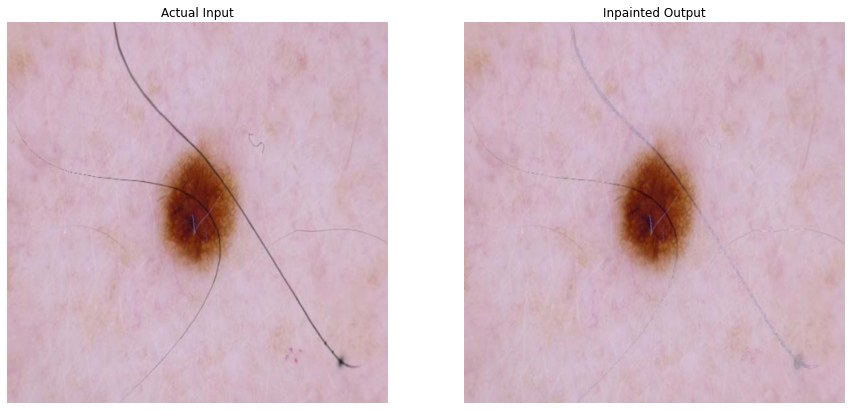

In [8]:
#@title Run to check the output.{ display-mode: "form" }
import cv2
import matplotlib.pyplot as plt

resize_size = (512,512)

input_image = cv2.imread("input/input_img.png")
output_image = cv2.imread("output/inpainted_img.png")

f, axarr = plt.subplots(1,2, figsize=(15,15))

rgbinput = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
axarr[0].imshow(cv2.resize(rgbinput, resize_size))
axarr[0].title.set_text('Actual Input')
axarr[0].axis('off')

rgboutput = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
axarr[1].imshow(cv2.resize(rgboutput, resize_size))
axarr[1].title.set_text('Inpainted Output')
axarr[1].axis('off')
